## 🛒 Analytics Task: Store-Level Sales Prediction for OC&Grocery

### 📌 Context
OC&Grocery is a **new client** undergoing a **5-year strategy refresh**. As part of this transformation, they have asked our team at OC&C to help **analyse store-level performance drivers** to support better decision-making.

### 🎯 Objective
The goal is to **predict annual sales at the store level** using provided data on store attributes. These predictions will be used to:

- Improve the **efficiency of the store portfolio**
- Support **strategic expansion** beyond the current store footprint
- Help OC&Grocery **reduce food waste** and enhance **customer satisfaction**

### 📂 Provided Data
You have access to two datasets:
- **Store Data:** Contains various attributes about each store (e.g., location, size, format, etc.)
- **Sales Data:** Provides the **annual sales figures** for each store

> ⚠️ *Not all store attributes will be relevant, part of your task is to determine which features matter most.*

### 🧠 Your Task
1. **Explore and clean** the datasets.
2. **Select relevant features** from the store data.
3. **Train a predictive model** that estimates annual sales for a subset of stores.
4. Evaluate the model's performance and ensure it's suitable for strategic recommendations.

> 📝 **Reminder:** Focus on balancing your time effectively between **Analytics** and **Strategy**. Avoid over-optimizing the model, spend your time wisely.


In [48]:
# Step 1: Install any required packages (if needed)
# Uncomment if packages dont seem to be installed
# !pip install pandas scikit-learn matplotlib seaborn

# Step 2: Import standard data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 3: Upload files from your local machine
# Make sure to have downloaded them from the Google Drive first!!
#from google.colab import files
# uploaded = files.upload()

# Step 4: Load your CSV files into Pandas DataFrames
# Replace 'store_data.csv' and 'sales_data.csv' with your actual filenames
store_df = pd.read_csv('../../Data/store_data.csv')
sales_df = pd.read_csv('../../Data/sales_data.csv')

# Step 5: Quick look at the data
print("Store data:")
display(store_df.head())

print("\nSales data:")
display(sales_df.head())


Store data:


,store_id,federal_state,store_format,location_type,store_age_years,store_area_sqm,assortment_count,fresh_food_percent,private_label_percent,organic_products_percent,staff_count,weekly_opening_hours,competitors_nearby,population_density,avg_income_area,parking_spaces,renovation_last_years,bakery_section,deli_counter,year
0,1,Bavaria,Hypermarket,Urban Residential,6,3920,15741,32.109906,15.188624,14.509256,25,90,5,2566,115,165,2,True,True,2024
1,2,North Rhine-Westphalia,Supermarket,Urban Center,15,1646,8399,44.633713,35.420685,7.841410,22,87,5,6056,106,35,7,True,True,2024
2,3,Saxony,Discounter,Urban Center,7,1231,2447,20.436180,66.443122,8.191310,6,78,5,4441,92,20,1,True,False,2024
3,4,North Rhine-Westphalia,Supermarket,Suburban,12,1704,9069,42.625427,34.803850,7.218120,23,84,1,1294,93,95,0,True,True,2024
4,5,North Rhine-Westphalia,Supermarket,Suburban,15,1296,6714,43.452243,24.802120,12.301529,15,75,3,1594,110,55,4,True,True,2024



Sales data:


,store_id,annual_sales
0,1,36912697
1,2,20121635
2,3,7140552
3,4,18404739
4,5,16994266


# EDA

In [49]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   store_id                  3000 non-null   int64  
 1   federal_state             3000 non-null   object 
 2   store_format              3000 non-null   object 
 3   location_type             3000 non-null   object 
 4   store_age_years           3000 non-null   int64  
 5   store_area_sqm            3000 non-null   int64  
 6   assortment_count          3000 non-null   int64  
 7   fresh_food_percent        3000 non-null   float64
 8   private_label_percent     3000 non-null   float64
 9   organic_products_percent  3000 non-null   float64
 10  staff_count               3000 non-null   int64  
 11  weekly_opening_hours      3000 non-null   int64  
 12  competitors_nearby        3000 non-null   int64  
 13  population_density        3000 non-null   int64  
 14  avg_inco

In [50]:
store_df.describe()

,store_id,store_age_years,store_area_sqm,assortment_count,fresh_food_percent,private_label_percent,organic_products_percent,staff_count,weekly_opening_hours,competitors_nearby,population_density,avg_income_area,parking_spaces,renovation_last_years,year
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.0
mean,1611.110333,11.975000,1551.372333,6175.033000,31.470647,40.411797,11.279024,14.137333,79.273333,3.554333,2860.424667,101.404667,50.973333,4.543667,2024.0
std,921.952690,6.773995,889.561789,5028.728703,8.316014,17.310411,5.426194,9.153346,9.574959,1.724347,1728.614398,12.261472,49.056819,4.473116,0.0
min,1.000000,0.000000,321.000000,528.000000,15.001029,10.059507,2.000000,3.000000,60.000000,0.000000,350.000000,70.000000,0.000000,0.000000,2024.0
25%,815.750000,7.000000,978.000000,1980.000000,23.992576,25.646145,6.987832,6.000000,72.000000,2.000000,1427.000000,93.000000,20.000000,0.000000,2024.0
50%,1617.500000,12.000000,1307.000000,3885.000000,30.139165,34.956313,10.465743,11.000000,78.000000,3.000000,2734.500000,102.000000,35.000000,3.000000,2024.0
75%,2409.250000,16.250000,1905.750000,9787.000000,38.990004,57.602183,14.878791,21.000000,84.000000,5.000000,3972.250000,110.000000,65.000000,8.000000,2024.0
max,3200.000000,30.000000,5470.000000,26879.000000,44.966530,69.996186,31.415520,49.000000,110.000000,7.000000,6499.000000,131.000000,340.000000,15.000000,2024.0


In [51]:
store_df["store_format"].value_counts()    

store_format
Supermarket    1201
Discounter     1185
Convenience     311
Hypermarket     303
Name: count, dtype: int64

In [52]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   store_id      3000 non-null   int64
 1   annual_sales  3000 non-null   int64
dtypes: int64(2)
memory usage: 47.0 KB


In [53]:
sales_df.describe()

,store_id,annual_sales
count,3000.000000,3.000000e+03
mean,1611.110333,1.666832e+07
std,921.952690,1.057503e+07
min,1.000000,1.144618e+06
25%,815.750000,1.104478e+07
50%,1617.500000,1.459208e+07
75%,2409.250000,1.989197e+07
max,3200.000000,7.849110e+07


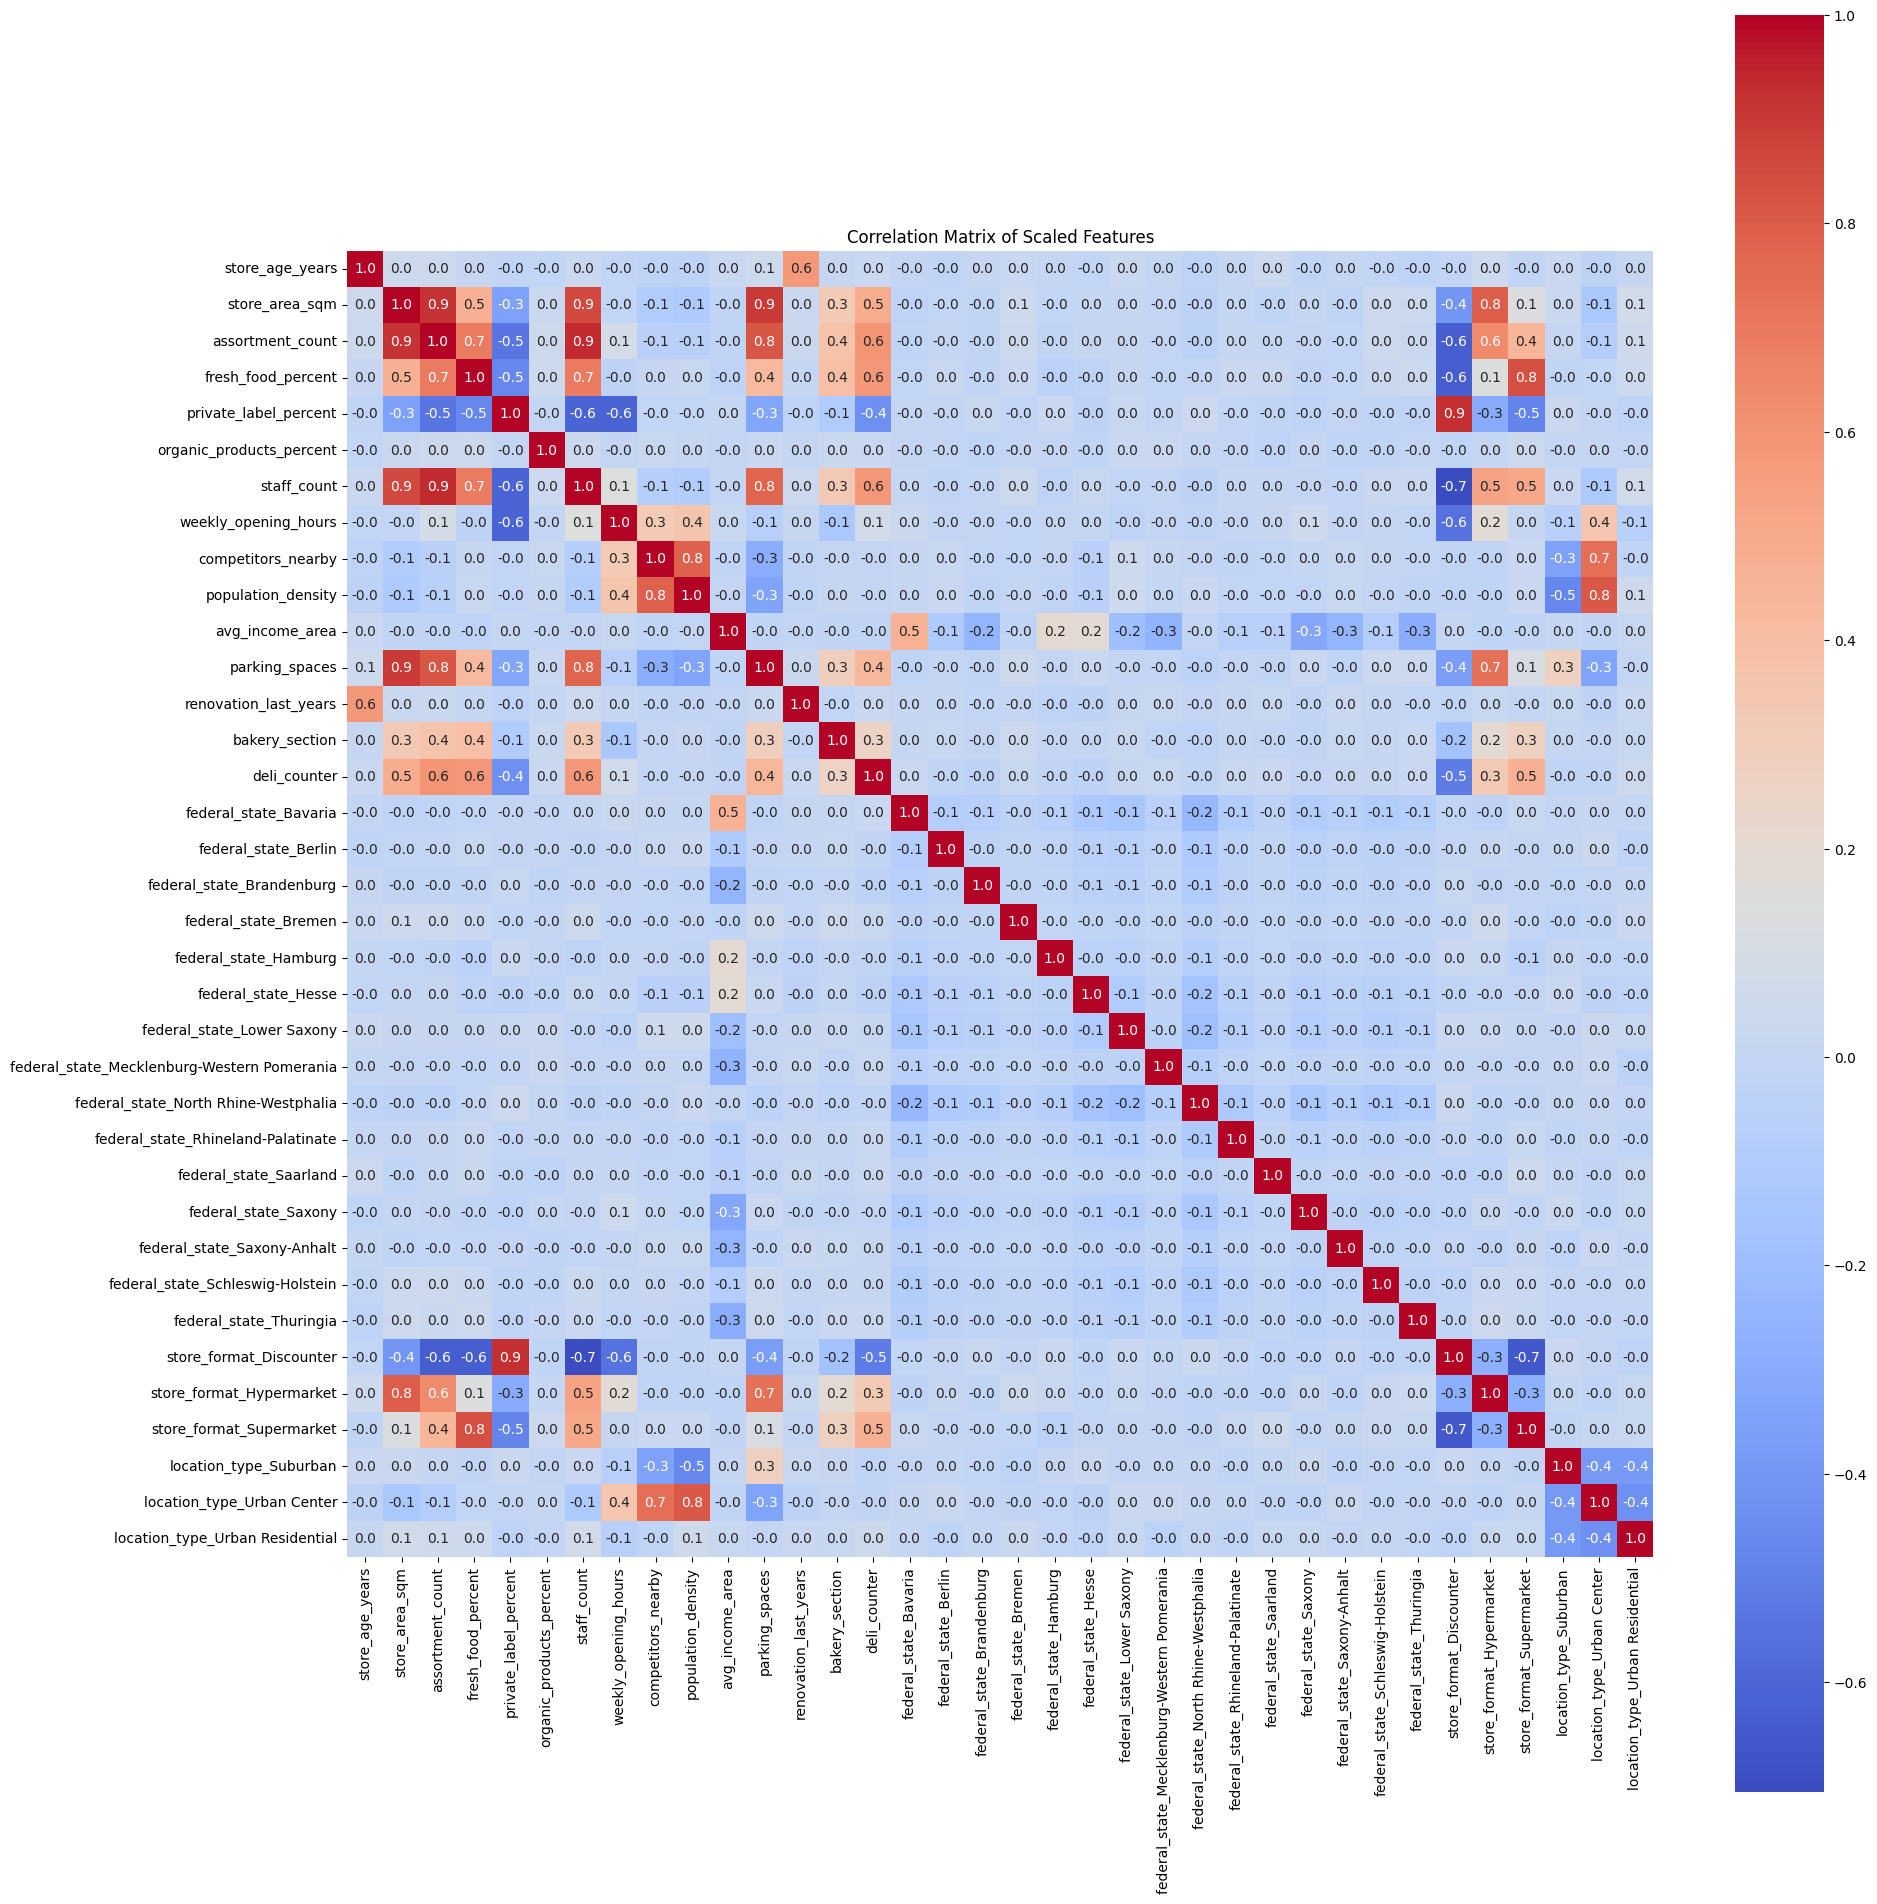

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Convert scaled data into DataFrame for easier handling
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Step 2: Calculate the correlation matrix
corr_matrix = X_train_scaled_df.corr()

# Step 3: Plot the correlation matrix using a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.1f', cbar=True, square=True)
plt.title("Correlation Matrix of Scaled Features")
plt.tight_layout()
plt.show()


# Preprocessing and Feature Preparation

In [55]:
# --- Preprocessing and Feature Preparation ---

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Merge store and sales data
df = pd.merge(store_df, sales_df, on='store_id')
print("Merged data shape:", df.shape)

# Step 2: Save store_id before dropping it, so we can link it back later
store_ids = df['store_id'].copy()

# Step 3: Drop irrelevant columns
df = df.drop(columns=['store_id', 'year'])

# Step 4: One-hot encode categorical columns
categorical_cols = ['federal_state', 'store_format', 'location_type']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Step 5: Split into features and target
X = df.drop(columns=['annual_sales'])
y = df['annual_sales']

# Step 6: Train-test split
X_train, X_test, y_train, y_test, store_ids_train, store_ids_test = train_test_split(
    X, y, store_ids, test_size=0.2, random_state=42
)

# Step 7: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 8: Keep DataFrames with feature names (optional, for analysis & plotting)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)


Merged data shape: (3000, 21)


In [56]:
# --- Linear Regression Model Training and Evaluation ---

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Step 6: Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Step 7: Predict and evaluate
y_pred_lr = lr_model.predict(X_test_scaled)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression RMSE: {rmse_lr:,.0f}")
print(f"Linear Regression R² Score: {r2_lr:.3f}")


Linear Regression RMSE: 13,219,761
Linear Regression R² Score: 0.162


In [57]:
# Step 8: Coefficient interpretation
import pandas as pd

coefficients = pd.Series(lr_model.coef_, index=X.columns)

print("\nTop 10 Positive Drivers of Sales:")
display(coefficients.sort_values(ascending=False).head(20))

print("\nTop 10 Negative Drivers of Sales:")
display(coefficients.sort_values().head(20))



Top 10 Positive Drivers of Sales:


store_format_Hypermarket           7.611078e+06
store_format_Supermarket           5.801567e+06
store_format_Discounter            3.699674e+06
store_area_sqm                     3.038873e+06
location_type_Urban Center         1.584137e+06
location_type_Urban Residential    1.240031e+06
location_type_Suburban             8.594902e+05
deli_counter                       4.388538e+05
organic_products_percent           3.996036e+05
avg_income_area                    3.345932e+05
private_label_percent              3.146430e+05
weekly_opening_hours               3.109561e+05
bakery_section                     2.736490e+05
staff_count                        2.654766e+05
fresh_food_percent                 1.711556e+05
federal_state_Bavaria              3.207072e+04
population_density                 2.928930e+04
federal_state_Hamburg              1.032143e+04
federal_state_Bremen              -1.835261e+04
federal_state_Saarland            -1.442022e+05
dtype: float64


Top 10 Negative Drivers of Sales:


competitors_nearby                            -1.153411e+06
federal_state_Lower Saxony                    -7.482994e+05
federal_state_Saxony                          -6.730062e+05
federal_state_Thuringia                       -6.176444e+05
renovation_last_years                         -5.928185e+05
federal_state_North Rhine-Westphalia          -5.774543e+05
federal_state_Mecklenburg-Western Pomerania   -4.898829e+05
federal_state_Schleswig-Holstein              -4.764829e+05
federal_state_Brandenburg                     -4.469842e+05
assortment_count                              -4.271137e+05
federal_state_Saxony-Anhalt                   -3.997388e+05
federal_state_Rhineland-Palatinate            -3.794387e+05
federal_state_Berlin                          -3.046755e+05
parking_spaces                                -2.927728e+05
store_age_years                               -1.873785e+05
federal_state_Hesse                           -1.653401e+05
federal_state_Saarland                  

/var/folders/_j/pxtg33rs3657dcdtz9vydvkc0000gn/T/ipykernel_9480/2798204826.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette=colors)


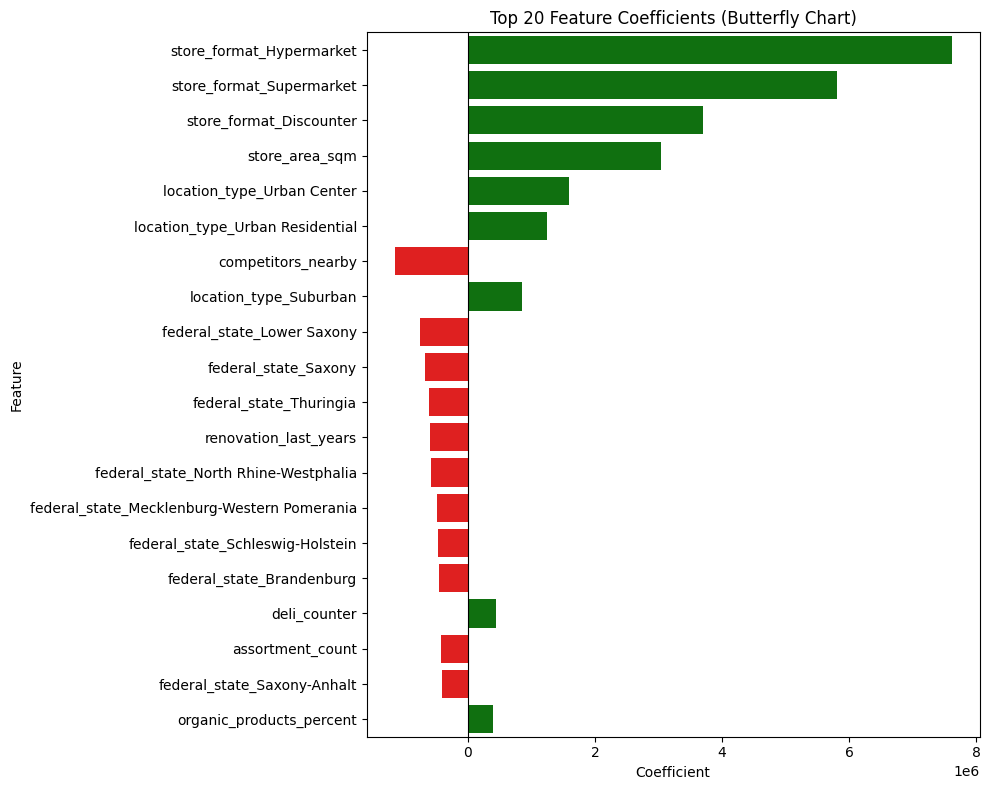

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create coefficient DataFrame
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr_model.coef_
})
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False).head(20)

# Set color by sign
colors = ['green' if c > 0 else 'red' for c in coef_df['Coefficient']]

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette=colors)
plt.axvline(0, color='black', linewidth=0.8)
plt.title('Top 20 Feature Coefficients (Butterfly Chart)')
plt.tight_layout()
plt.show()


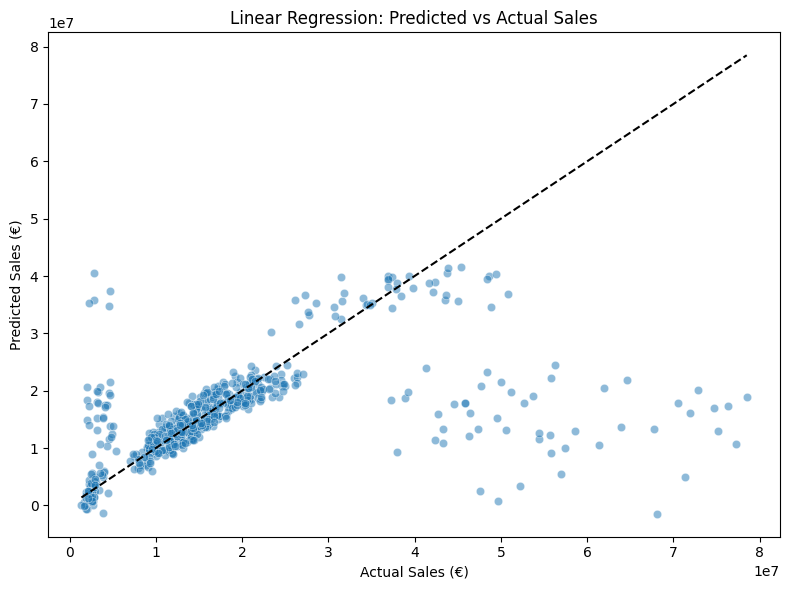

In [59]:
import numpy as np

# Predict (if not already done)
y_pred_lr = lr_model.predict(X_test_scaled)

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='black')
plt.xlabel("Actual Sales (€)")
plt.ylabel("Predicted Sales (€)")
plt.title("Linear Regression: Predicted vs Actual Sales")
plt.tight_layout()
plt.show()


In [60]:
import numpy as np
import pandas as pd

# Step 1: Predict sales using your trained model
y_pred_lr = lr_model.predict(X_test_scaled)

# Step 2: Create performance DataFrame
performance_df = pd.DataFrame({
    'store_id': store_ids_test.values,
    'Actual_Sales': y_test.values,
    'Predicted_Sales': y_pred_lr
})

# Step 3: Calculate residuals and flag underperformers
performance_df['Residual'] = performance_df['Actual_Sales'] - performance_df['Predicted_Sales']
performance_df['Underperforming'] = performance_df['Residual'] < 0

# Step 4: Sort and display top underperformers
underperformers = performance_df[performance_df['Underperforming']].sort_values(by='Residual')

print("🔻 Top 10 Underperforming Stores (Actual < Predicted):")
display(underperformers.head(10))


🔻 Top 10 Underperforming Stores (Actual < Predicted):


,store_id,Actual_Sales,Predicted_Sales,Residual,Underperforming
23,2233,2878382,4.056196e+07,-3.768358e+07,True
68,1702,2263883,3.522023e+07,-3.295635e+07,True
2,1953,2886322,3.582377e+07,-3.293744e+07,True
39,1397,4732755,3.737111e+07,-3.263835e+07,True
86,2698,4522295,3.471322e+07,-3.019092e+07,True
56,1467,2082001,2.069507e+07,-1.861307e+07,True
42,433,3491022,2.068044e+07,-1.718942e+07,True
50,1177,3177359,2.000068e+07,-1.682332e+07,True
52,221,4662050,2.143626e+07,-1.677421e+07,True
59,1080,2014678,1.845958e+07,-1.644490e+07,True


In [63]:
# Step 1: Get the top N underperforming store_ids
top_underperformers = underperformers.head(10)['store_id'].values

# Step 2: Extract original feature values for those stores
underperforming_features = store_df[store_df['store_id'].isin(top_underperformers)].set_index('store_id')

# Step 3: Combine with residuals for context
underperforming_with_perf = underperforming_features.join(
    underperformers.set_index('store_id')[['Actual_Sales', 'Predicted_Sales', 'Residual']]
)

# Step 4: View the key columns for diagnosis
cols_to_inspect = [
    'store_format', 'location_type', 'store_area_sqm', 'avg_income_area', 'staff_count',
    'organic_products_percent', 'competitors_nearby', 'assortment_count', 'renovation_last_years'
]

display(underperforming_with_perf[cols_to_inspect + ['Actual_Sales', 'Predicted_Sales', 'Residual']])


,store_format,location_type,store_area_sqm,avg_income_area,staff_count,organic_products_percent,competitors_nearby,assortment_count,renovation_last_years,Actual_Sales,Predicted_Sales,Residual
store_id,,,,,,,,,,,,
221,Supermarket,Urban Residential,1566,112,19,13.100738,2,8404,1,4662050,2.143626e+07,-1.677421e+07
433,Supermarket,Urban Residential,1830,107,19,12.795870,5,10761,1,3491022,2.068044e+07,-1.718942e+07
1080,Supermarket,Urban Residential,1938,92,22,7.170469,2,8972,5,2014678,1.845958e+07,-1.644490e+07
1177,Supermarket,Suburban,2067,93,20,13.259405,2,12762,2,3177359,2.000068e+07,-1.682332e+07
1397,Hypermarket,Rural,4688,73,39,26.620866,1,20558,6,4732755,3.737111e+07,-3.263835e+07
1467,Supermarket,Urban Center,1692,119,17,16.569486,5,8105,6,2082001,2.069507e+07,-1.861307e+07
1702,Hypermarket,Urban Center,3494,87,30,8.278464,6,14760,0,2263883,3.522023e+07,-3.295635e+07
1953,Hypermarket,Urban Center,2337,112,21,19.568997,5,9671,1,2886322,3.582377e+07,-3.293744e+07
2233,Hypermarket,Urban Residential,4880,104,41,7.172856,3,16901,11,2878382,4.056196e+07,-3.768358e+07


In [65]:
merged_df.head()

,store_age_years,store_area_sqm,assortment_count,fresh_food_percent,private_label_percent,organic_products_percent,staff_count,weekly_opening_hours,competitors_nearby,population_density,...,federal_state_Schleswig-Holstein,federal_state_Thuringia,store_format_Discounter,store_format_Hypermarket,store_format_Supermarket,location_type_Suburban,location_type_Urban Center,location_type_Urban Residential,store_id,underperforming
0,11,689,1408,16.527323,23.852931,5.743171,11,104,2,1065,...,False,False,False,False,False,True,False,False,1935,True
1,9,1832,8622,41.670836,38.474605,11.914483,21,66,2,494,...,False,False,False,False,True,False,False,False,1282,True
2,7,2337,9671,37.579666,27.038952,19.568997,21,96,5,6249,...,False,False,False,True,False,False,True,False,1953,True
3,10,2287,10591,38.272677,39.588135,2.389925,25,72,2,1296,...,False,False,False,False,True,True,False,False,278,True
4,10,1787,9335,39.498285,26.995133,9.816191,20,81,2,3325,...,False,False,False,False,True,False,False,True,2678,False


In [64]:
# Step 1: Create a unified performance dataframe with store_id and underperformance flag
performance_df_full = pd.DataFrame({
    'store_id': store_ids_test.values,
    'underperforming': y_test.values < lr_model.predict(X_test_scaled)
})

# Step 2: Add the features for those same test stores
X_test_features = X_test.copy()
X_test_features['store_id'] = store_ids_test.values

# Step 3: Merge features with underperformance label
merged_df = pd.merge(X_test_features, performance_df_full, on='store_id')

# Step 4: Calculate correlation of all numeric features with underperformance
corr_scores = merged_df.drop(columns=['store_id']).corr(numeric_only=True)
underperf_corr = corr_scores['underperforming'].drop('underperforming').sort_values(ascending=False)

# Step 5: Display top differentiators
print("🔍 Top Variables Positively Correlated with Underperformance:")
display(underperf_corr.head(10))

print("\n🔍 Top Variables Negatively Correlated with Underperformance:")
display(underperf_corr.tail(10))


🔍 Top Variables Positively Correlated with Underperformance:


parking_spaces              0.111561
staff_count                 0.107518
store_area_sqm              0.102470
assortment_count            0.099484
store_format_Hypermarket    0.092583
bakery_section              0.079073
federal_state_Hesse         0.064866
federal_state_Bremen        0.060930
weekly_opening_hours        0.050033
organic_products_percent    0.048898
Name: underperforming, dtype: float64


🔍 Top Variables Negatively Correlated with Underperformance:


federal_state_Berlin                 -0.013424
federal_state_Hamburg                -0.015175
federal_state_Bavaria                -0.026172
federal_state_Rhineland-Palatinate   -0.028554
competitors_nearby                   -0.033047
federal_state_Saxony                 -0.040639
federal_state_Brandenburg            -0.058706
private_label_percent                -0.068688
store_format_Discounter              -0.081405
federal_state_Thuringia              -0.093790
Name: underperforming, dtype: float64

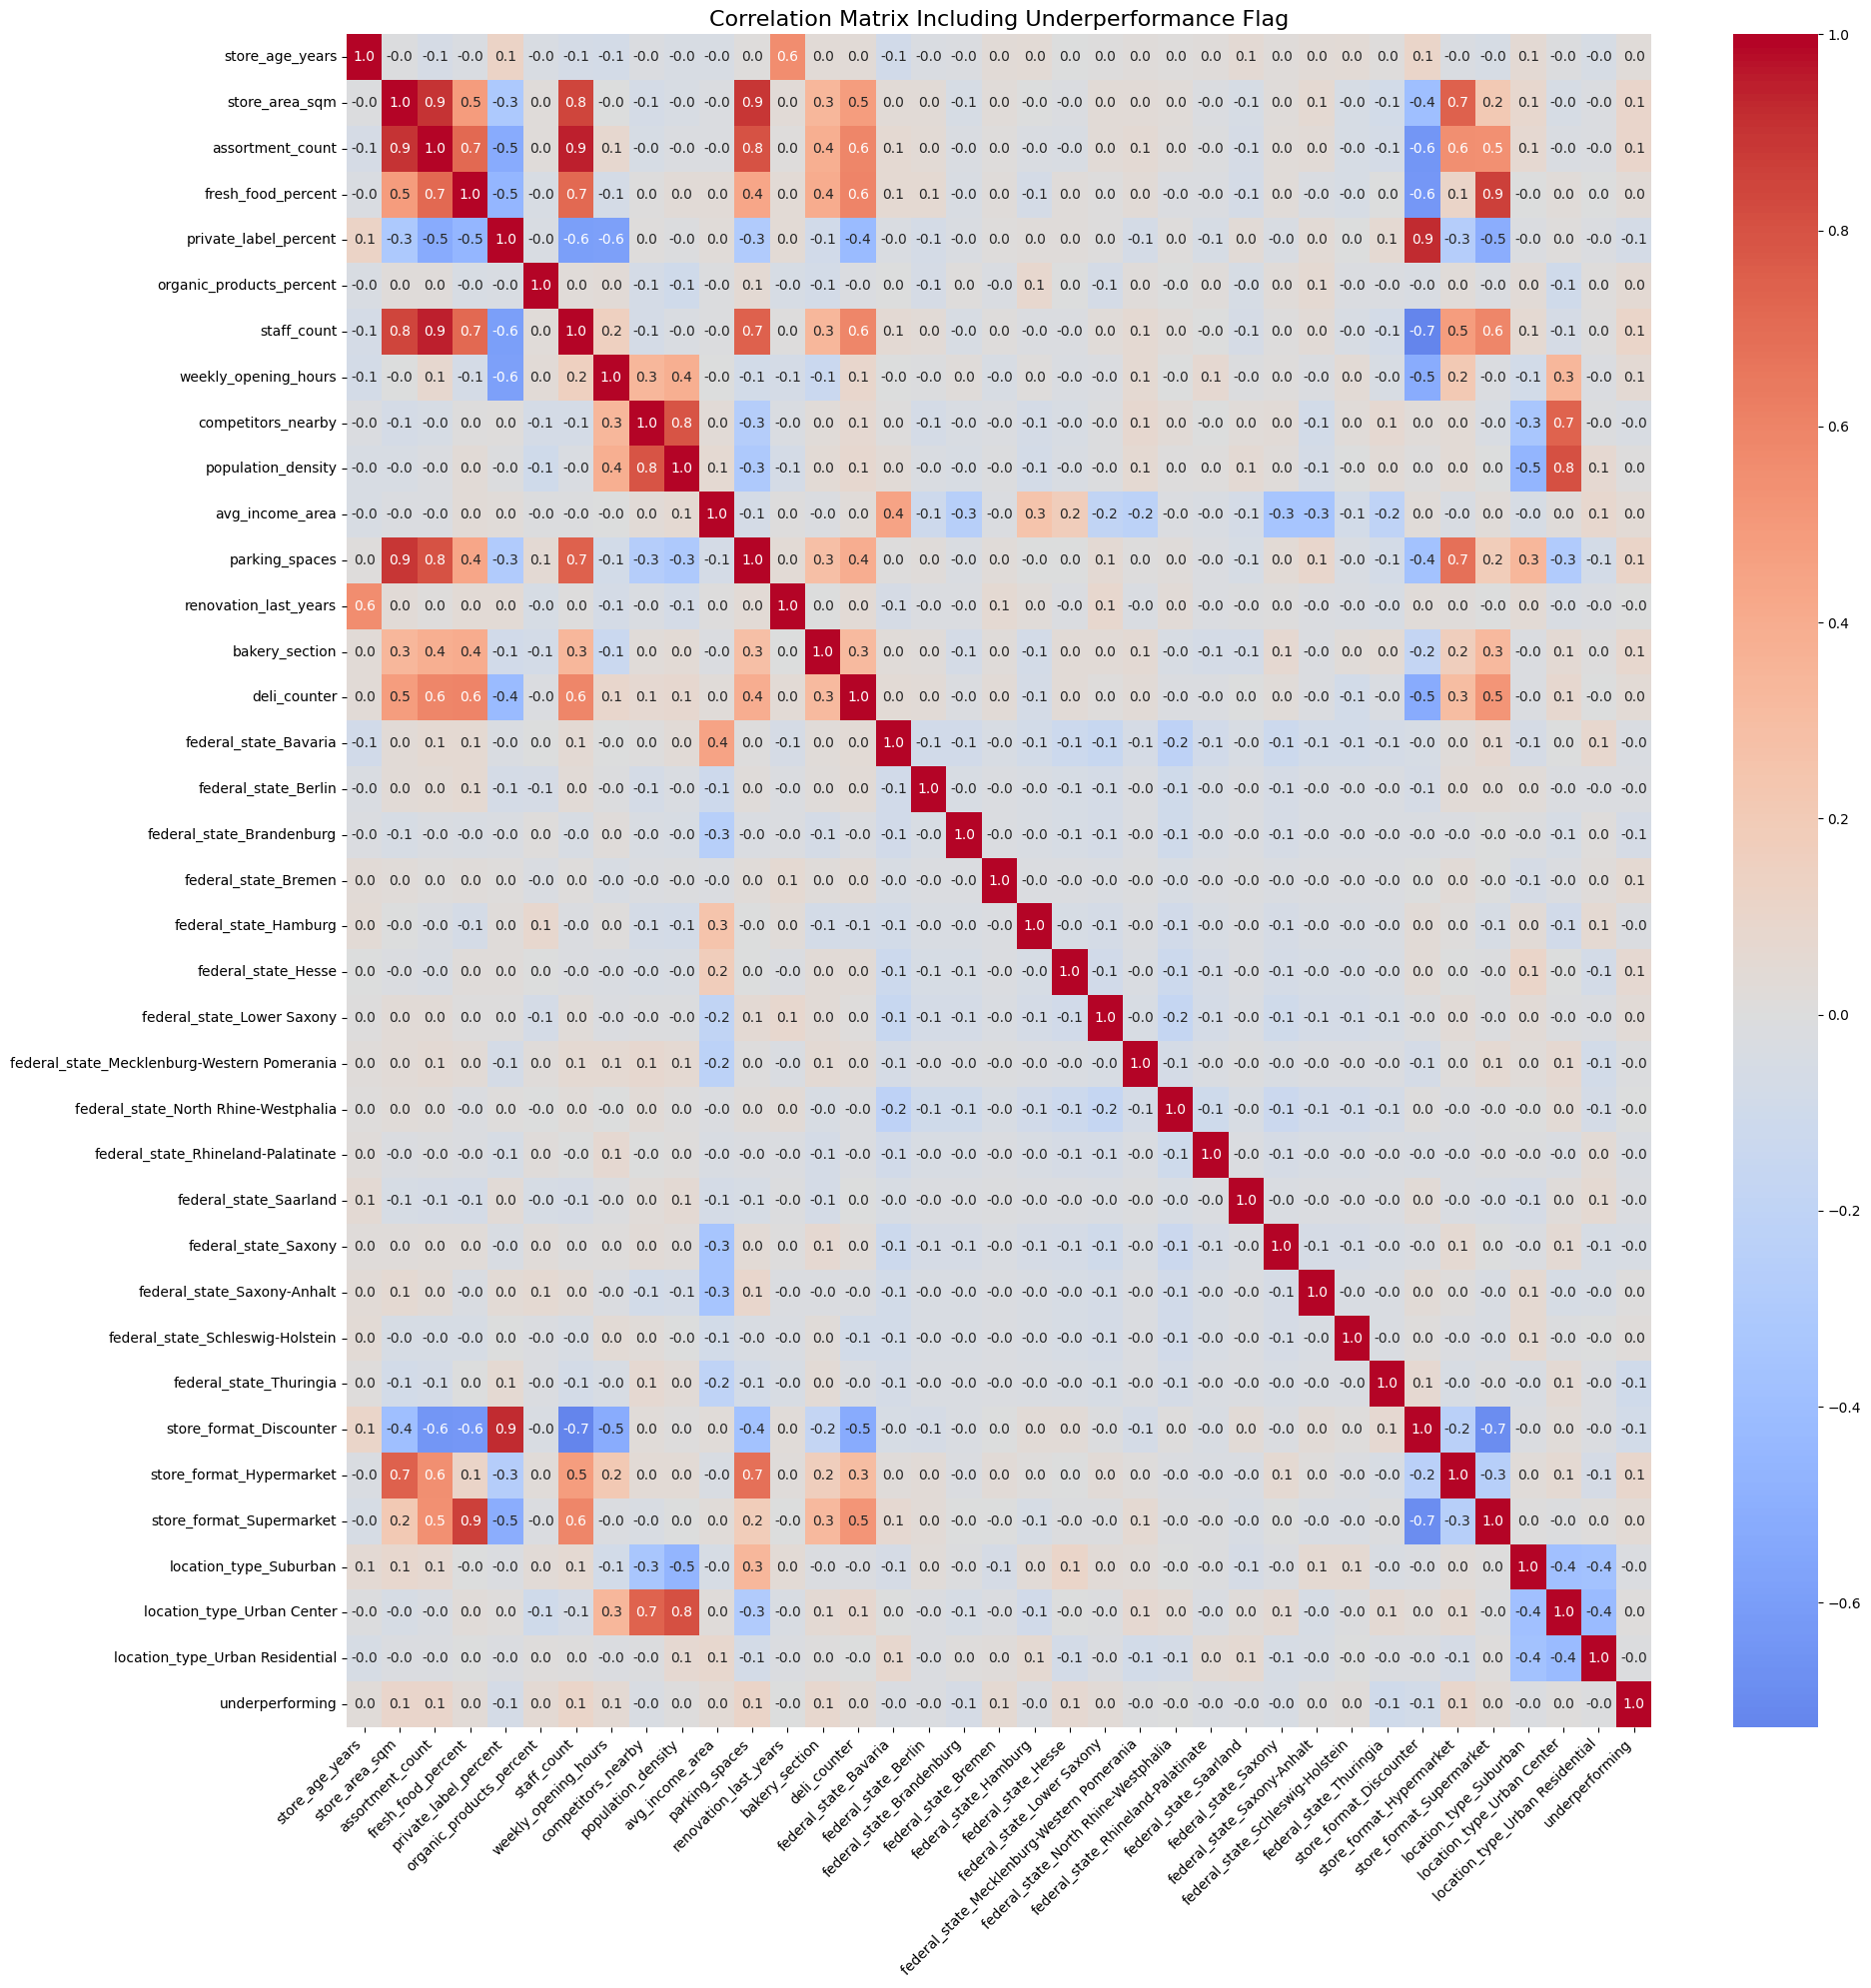

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create a DataFrame with underperformance flag for the test set
# Note: Underperforming if Actual < Predicted
underperf_flag = y_test.values < lr_model.predict(X_test_scaled)
performance_df_full = pd.DataFrame({
    'store_id': store_ids_test.values,
    'underperforming': underperf_flag.astype(int)  # convert boolean to 0/1
})

# Step 2: Add the original features for these test stores (without scaling)
# We use X_test which has the original values
X_test_features = X_test.copy()
X_test_features['store_id'] = store_ids_test.values

# Step 3: Merge features with the underperformance flag
merged_df = pd.merge(X_test_features, performance_df_full, on='store_id')

# Step 4: Drop non-numeric columns if necessary (like store_id)
corr_df = merged_df.drop(columns=['store_id'])

# Step 5: Calculate the correlation matrix
corr_matrix = corr_df.corr()

# Step 6: Plot the correlation matrix using seaborn
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap="coolwarm", center=0)
plt.title("Correlation Matrix Including Underperformance Flag", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
